# INFORME 2


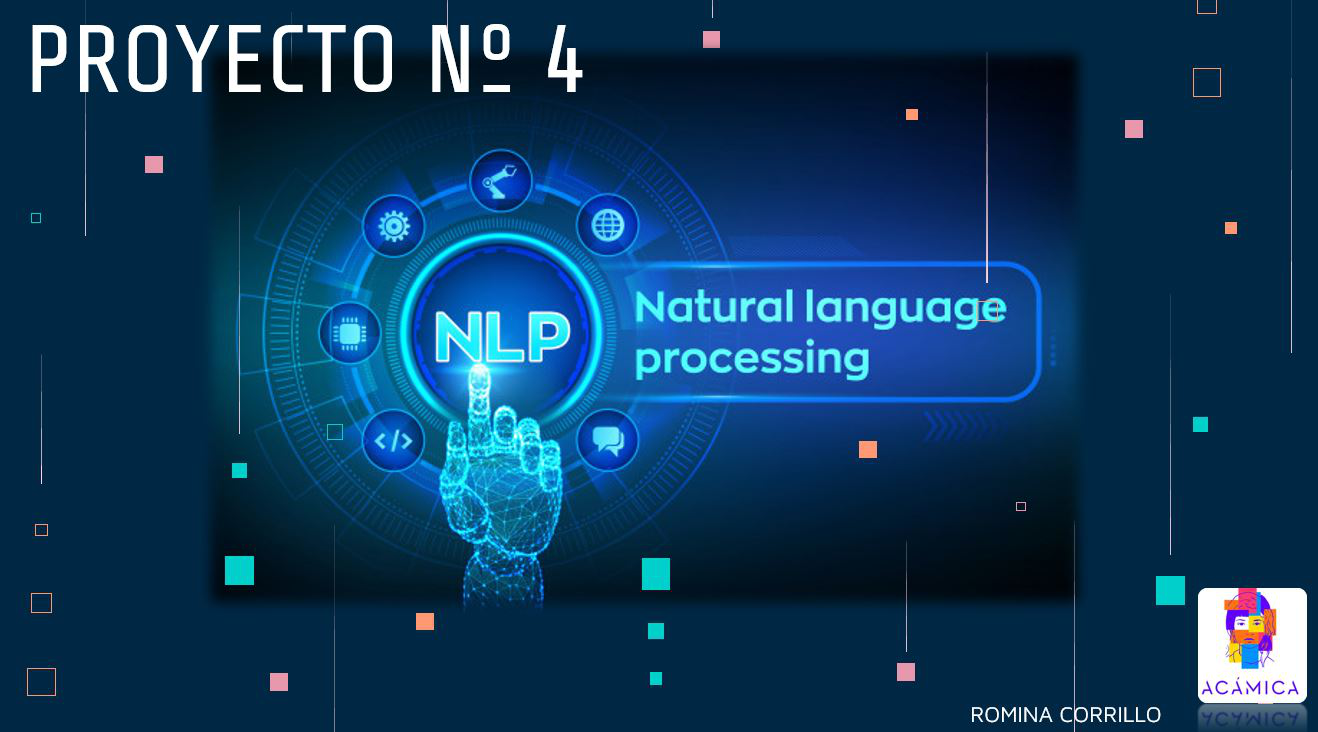

In [43]:
from PIL import Image
img = Image.open('intro.jpg')
img

# <font color=green> Utilización Redes neuronales convolucionales
   Aplicación de Redes Neuronales convolucionales para problema multiclase

## Descripción
En este informe se realizará un análisis de reseñas de Amazon diseñadas específicamente para ayudar a la investigación en la clasificación de textos. El conjunto de datos contiene reseñas en español. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación por estrellas (1-5) y un revisor anónimo ID, una ID de producto anónima y la categoría de producto.

## Objetivo

Utilizar redes neuronales convolucionales para la clasificación multiclase en el problema de reseñas de amazón con sus calificaciones (1-5)


# Fase 1: Importar las dependencias


In [1]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup

#from google.colab import drive

In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow.keras import layers


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
import tensorflow_datasets as tfds

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
from wordcloud import WordCloud  # esto es para la nube de palabras
import re
from nltk.stem import WordNetLemmatizer
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk  # es una popular librería de Python que se utiliza para NLP.

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

# Importamos el lemmatizar de NLTK, y creamos el objeto
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres


from textblob import TextBlob #análisis de sentimientos

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Importación de los stopwords del español e impresión
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('spanish')

In [6]:
#Importación del archivo train
dataset3 = pd.read_json('datos\dataset_es_train.json', lines=True)

# Fase 2: Pre Procesado de Datos

In [7]:
dataset3.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


El conjunto de datos de testing tiene 3 etiquetas diferentes (una negativa, una positiva y una neutra), mientras que el conjunto de datos de entrenamiento tiene solo dos, por lo que no usaremos el archivo de testing y dividiremos el archivo de entrenamiento más tarde nosotros mismos.

In [8]:
data = dataset3.copy()

## Pre Procesado

### Limpieza

In [9]:
data['opiniones'] = data['review_title'] +','+ data['review_body']

In [10]:
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,opiniones
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics,"Tal y como se describe,Mando funciona perfecta..."
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics,"Funciona perfectamente,Compré la batería con c..."
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel,"Buena calidad.,Buena calidad. Satisfecha con l..."
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy,"Recomendado,Perfecto para el cumple de mi hijo"
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home,"Preciosas,Súper bien! Las brochas son buenas, ..."


In [11]:
data.drop(["review_id", "product_id", "reviewer_id", "language","product_category","review_body","review_title"], # No te olvides de ejecutar data = train_data antes de nada!
          axis=1,
          inplace=True)

In [12]:
#función para que realice la limpieza del texto
def clean_review(texto):
    texto = BeautifulSoup(texto, "lxml").get_text()
    # Eliminamos la @ y su mención
    texto = re.sub(r"@[A-Za-z0-9]+", ' ', texto)
    # Eliminamos los links de las URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
    # Nos quedamos solamente con los caracteres
    texto = re.sub(r"[^a-zA-Z.!?']", ' ', texto)
    # Eliminamos espacios en blanco adicionales
    texto = re.sub(r" +", ' ', texto)
    texto = texto.lower()
    # texto = [palabra for palabra in texto if len(texto)>3]
    texto = re.sub(r" +", ' ', texto)
     
    # sacamos los puntos seguidos
    texto = re.sub(r"[.2-5]", ' ', texto)
    # sacamos los signos admiración seguidos
    texto = re.sub(r"[!2-5]", ' ', texto)
   
    
    return texto

In [13]:
#aplicacmos la función limpia el texto
data_clean = [clean_review(texto) for texto in data.opiniones]

In [14]:
# Sacamos las Stopwords
data_clean = [palabra for palabra in data_clean if not palabra in stopwords]

In [15]:
#Visualización de texto
data_clean

['television nevir nada bueno se me fue ka pantalla en menos de meses y no he recibido respuesta del fabricante',
 'dinero tirado a la basura con esta compra horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingl s ni un inform tico despu s de una hora fue capaz de instalarlo',
 'solo llega una unidad cuando te obligan a comprar dos te obligan a comprar dos unidades y te llega solo una y no hay forma de reclamar una autentica estafa no compreis  ',
 'producto no recibido  no entro en descalificar al vendedor solo puedo decir que tras dos meses de espera     sigo sin el producto y tuve que contactar con amazon para reclamar su reembolso  amazon un   se hace cargo del problema pero yo e desembolsado mi dinero y en dos meses me lo devuelven perdida de tiempo total  sin palabras  y ustedes deciden',
 'devuelto llega tarde y co la talla equivocada',
 'jam s me lleg jam s me lleg y el vendedor nunca contacto conmigo a pesar de intentarlo veces',
 'horroroso    el paraguas 

### Tokenización
separar palabras del texto en entidades llamadas tokens, con las que trabajaremos luego.

In [16]:
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    data_clean, target_vocab_size=2**16 #tamaño de mi corpus, las palabras que aparecen poco se eliminan
)

data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

### Padding

In [17]:
#Vectorización de las palabras
MAX_LEN = max([len(sentence) for sentence in data_inputs])
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value=0,
                                                            padding="post",
                                                            maxlen=MAX_LEN)

In [18]:
#impresión de mi matriz
data_inputs

array([[10318, 20453,    56, ...,     0,     0,     0],
       [  226,  1029,     8, ...,     0,     0,     0],
       [   75,   292,    25, ...,     0,     0,     0],
       ...,
       [   34,   116,     2, ...,     0,     0,     0],
       [  885,    65,    14, ...,     0,     0,     0],
       [ 2918,    20,   455, ...,     0,     0,     0]])

### Dividimos en los conjuntos de entrenamiento y de testing


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = data_inputs
y = dataset3['stars'].values
#pasar las estrellas de 0 a 4
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
train_inputs, test_inputs, train_labels, test_labels = train_test_split(X, y,test_size=0.3,random_state=101)

# Fase 3: Construción del modelo

Definición de red neuronal

In [20]:
class DCNN(tf.keras.Model):
    
    def __init__(self,
                 vocab_size,
                 emb_dim=128, #dimensión de embedding
                 nb_filters=50, #cantidad de filtros
                 FFN_units=512, #cantidad de neuronas que queremos para redes neuronales densas
                 nb_classes=2, #en primer instancia voy a definir como 2 clases pero despues voy a cambiarlo
                 dropout_rate=0.1, #% de neurona que quiero apagar. Nos sirve para regularización y evitar el overfitting
                 training=False,
                 name="dcnn"):
        super(DCNN, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocab_size,    #embedding va organizando las palabras que tengo en mi corpus
                                          emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding="valid",
                                    activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding="valid",
                                      activation="relu")
        self.pool = layers.GlobalMaxPool1D() # No tenemos variable de entrenamiento
                                             # así que podemos usar la misma capa 
                                             # para cada paso de pooling
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu") #capa de neuronas densas
        self.dropout = layers.Dropout(rate=dropout_rate) #capa para regularización 
        
        ####### Capa de salida ###################
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid") #en el caso de que sea de dos clases
        else:
            self.last_dense = layers.Dense(units=nb_classes,
                                           activation="softmax") #en caso de que sean mas de dos clases
      ##################################
    def call(self, inputs, training):  #armando mi red neuronal 3capas de convolución 
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        #concatenando los resultados en un vector y lo introduzco en mi red neuronal densa
        merged = tf.concat([x_1, x_2, x_3], axis=-1) # (batch_size, 3 * nb_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

# Paso 4: Aplicación

## Configuración

In [21]:
#definición de parametros para cambiar los de que puse por default

VOCAB_SIZE = tokenizer.vocab_size # 65540

EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 5 #len(set(train_labels)) #cantidad nros de estrellas diferentes -- cantidad diferente en mi etiqueta 

DROPOUT_RATE = 0.95 #0.8 #regularización 
                
BATCH_SIZE =32 #32 Reducimos los pesos50
NB_EPOCHS = 5 #epocas

## Entrenamiento

In [22]:
#instanciamos la clase DCNN para actualizar los parametros
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters=NB_FILTERS,
            FFN_units=FFN_UNITS,
            nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
#Definimos función de pérdida, optimizador y métrica
if NB_CLASSES == 2:
    Dcnn.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
else:
    Dcnn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["sparse_categorical_accuracy"])

In [24]:
########esta celda es la configuración para guardar el entrenamiento de mi red neuronal##

#checkpoint_path = r"C:\proyecto" #ruta donde se guardaria la red entrenada.. deberia estar en tu local!

#ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

#ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

#if ckpt_manager.latest_checkpoint:
    #ckpt.restore(ckpt_manager.latest_checkpoint)
    #print("Último checkpoint restaurado!!")

In [25]:
#visualización de matriz entrenada
train_inputs

array([[  13, 3347, 1525, ...,    0,    0,    0],
       [  47,  206,    2, ...,    0,    0,    0],
       [  33,    3,    8, ...,    0,    0,    0],
       ...,
       [   6,   16, 2613, ...,    0,    0,    0],
       [  12,   21,    9, ...,    0,    0,    0],
       [  14,  165,    4, ...,    0,    0,    0]])

In [26]:
#Entrenamiento de red neuronal
Dcnn.fit(train_inputs,
         train_labels,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS)
#ckpt_manager.save() Esta linea es para guardar el entrenamiento

Epoch 1/5
140000/140000 [==============================] - 2071s 15ms/sample - loss: 1.3488 - sparse_categorical_accuracy: 0.3733
Epoch 2/5
140000/140000 [==============================] - 2051s 15ms/sample - loss: 1.1906 - sparse_categorical_accuracy: 0.4566
Epoch 3/5
140000/140000 [==============================] - 2050s 15ms/sample - loss: 1.1166 - sparse_categorical_accuracy: 0.4913
Epoch 4/5
140000/140000 [==============================] - 2053s 15ms/sample - loss: 1.0594 - sparse_categorical_accuracy: 0.5212
Epoch 5/5
140000/140000 [==============================] - 2057s 15ms/sample - loss: 0.9993 - sparse_categorical_accuracy: 0.5509



## Evaluación

In [27]:
#Evaluación de mi conjuto test
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=BATCH_SIZE )
print(results)


60000/60000 [==============================] - 138s 2ms/sample - loss: 1.1659 - sparse_categorical_accuracy: 0.5224
[1.1658917947769165, 0.52236664]



## Conclusión

Luego de varias modificaciones de hiperparametros de la configuración de la red se llegó a más de un 50% de acuraccy para la clasificacion multiclase aunque es baja pero antes me daba overfitting. Es evidente que es mejor aplicar un modelo de machine learnig para un problema binario como lo realizado en **DS_Proyecto_04_NLP_CorrilloRomina** ubicado en https://github.com/RomiLuna/proyecto4_DS